In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
dt=pd.read_csv('netflix_titles.csv')

In [3]:
dt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
dt.drop_duplicates(inplace=True)

In [6]:
dt.info()
dt.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


(8807, 12)

In [7]:
dt.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
col=dt.columns
col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
genre_dist=dt[['release_year','title']]
genre_dist=genre_dist.groupby('release_year',as_index=False).count().sort_values(by='title',ascending=False).head(30)
genre_dist.head()

,release_year,title
70,2018,1147
69,2017,1032
71,2019,1030
72,2020,953
68,2016,902


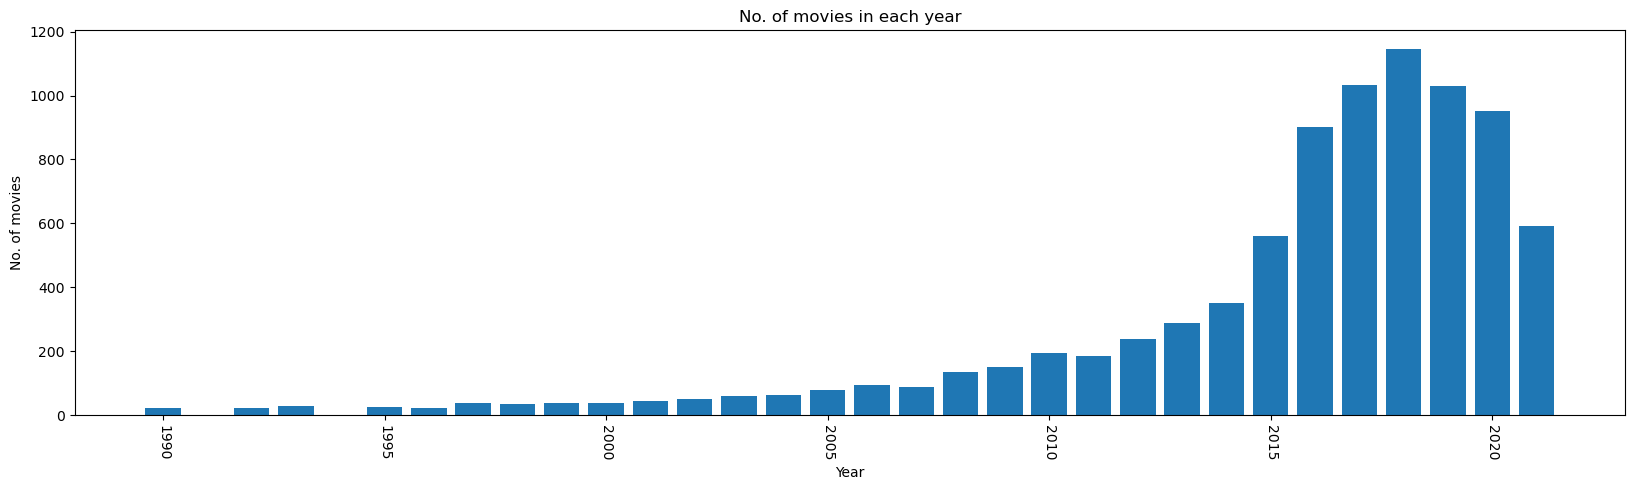

In [10]:
plt.figure(figsize=(20,5))
plt.title('No. of movies in each year')
plt.xlabel('Year')
plt.ylabel('No. of movies')
plt.bar(genre_dist['release_year'],genre_dist['title'])
plt.xticks(rotation=-90)
plt.show()

In [11]:
year_dist=dt[['duration','title']]
year_dist=year_dist.groupby('duration',as_index=False).count().sort_values(by='title',ascending=False).sort_values(by='duration',ascending=True)
year_dist.head()

,duration,title
0,1 Season,1793
1,10 Seasons,7
2,10 min,1
3,100 min,108
4,101 min,116


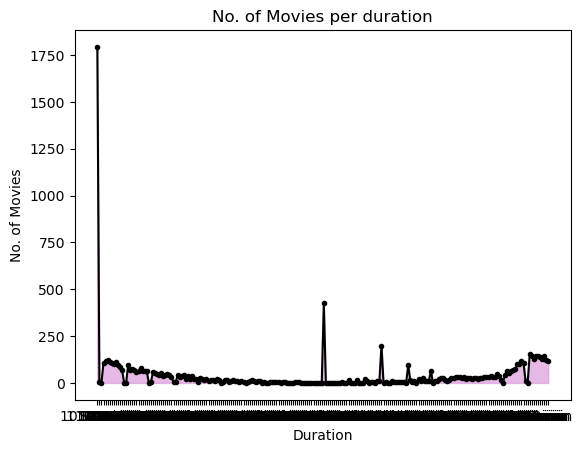

In [12]:
plt.plot(year_dist['duration'],year_dist['title'],marker='.',color='black')
plt.fill_between(year_dist['duration'],year_dist['title'],alpha=0.75,color='plum')
plt.title('No. of Movies per duration')
plt.xlabel('Duration')
plt.ylabel('No. of Movies')
plt.show()

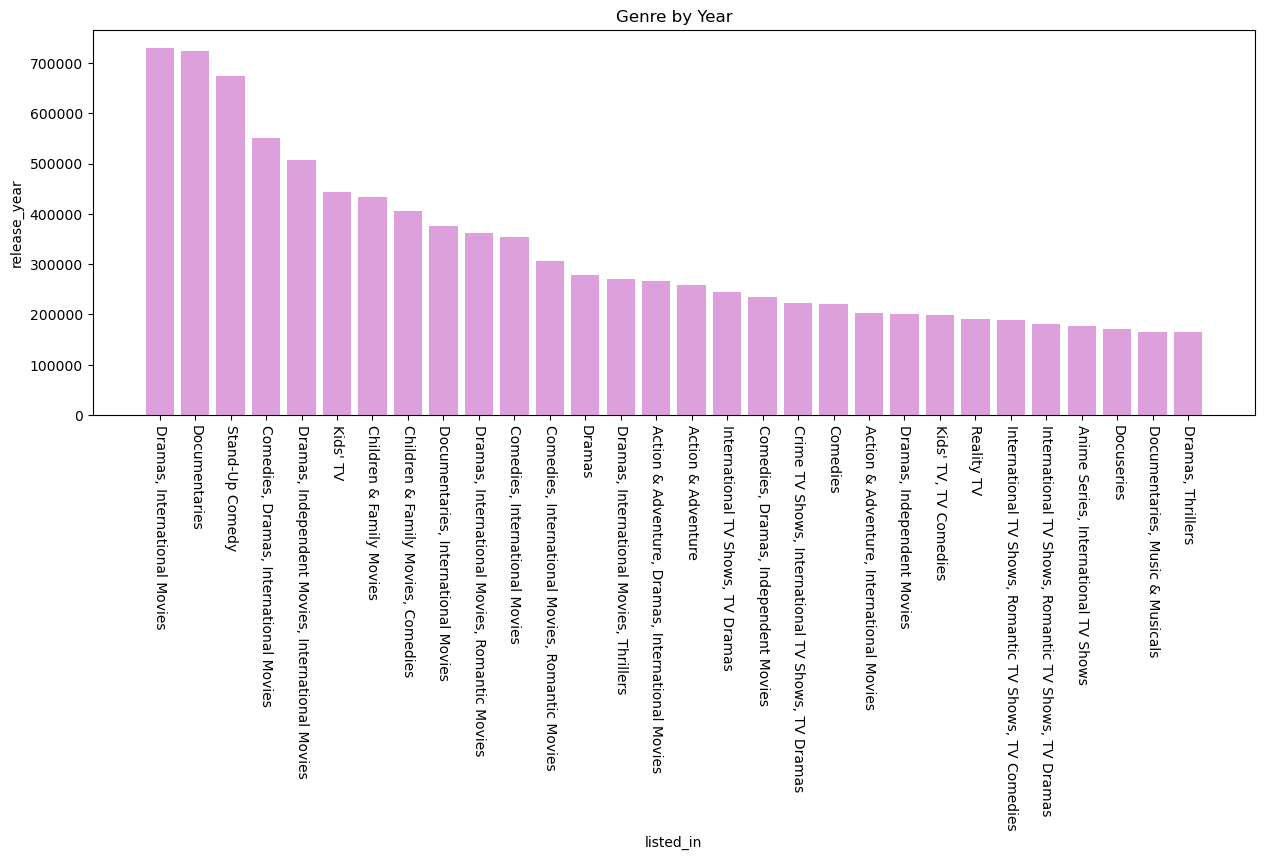

In [13]:
popularity_dist=dt[['listed_in','release_year']]
popularity_dist=popularity_dist.groupby('listed_in',as_index=False).sum().sort_values(by='release_year',ascending=False).head(30)
plt.figure(figsize=(15,5))
plt.bar(popularity_dist['listed_in'],popularity_dist['release_year'],color='plum')
plt.title('Genre by Year')
plt.xlabel('listed_in')
plt.ylabel('release_year')
plt.xticks(rotation=-90)
plt.show()

In [14]:
top_artist=dt[['director','title']]
top_artist=top_artist.groupby('director',as_index=False).count().sort_values(by='title',ascending=False).head(50)

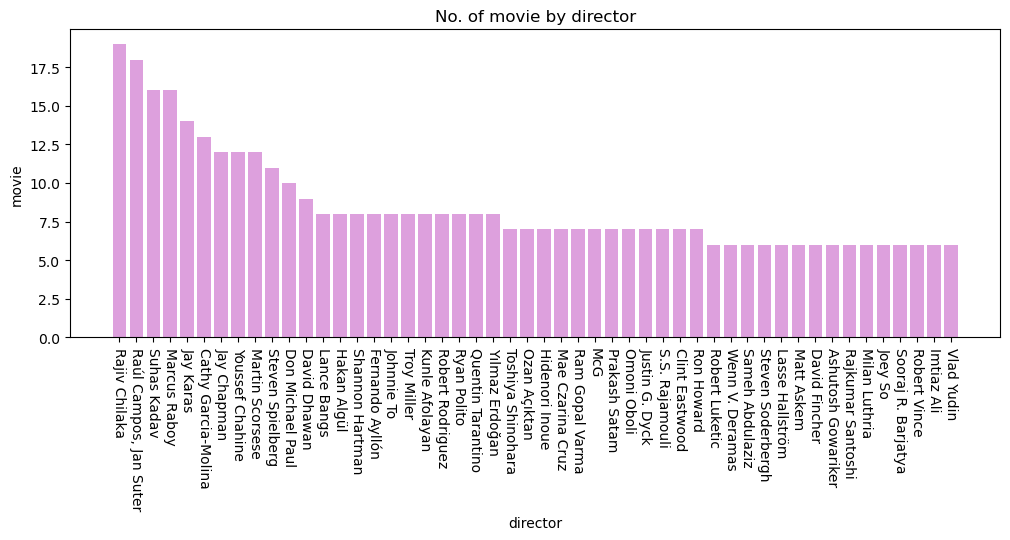

In [15]:
plt.figure(figsize=(12,4))
plt.bar(top_artist['director'],top_artist['title'],color='plum')
plt.title('No. of movie by director')
plt.xlabel('director')
plt.ylabel('movie')
plt.xticks(rotation=-90)
plt.show()

In [16]:
top_songs=dt[['title','release_year']]
top_songs=top_songs.sort_values(by='release_year',ascending=False).head(30)

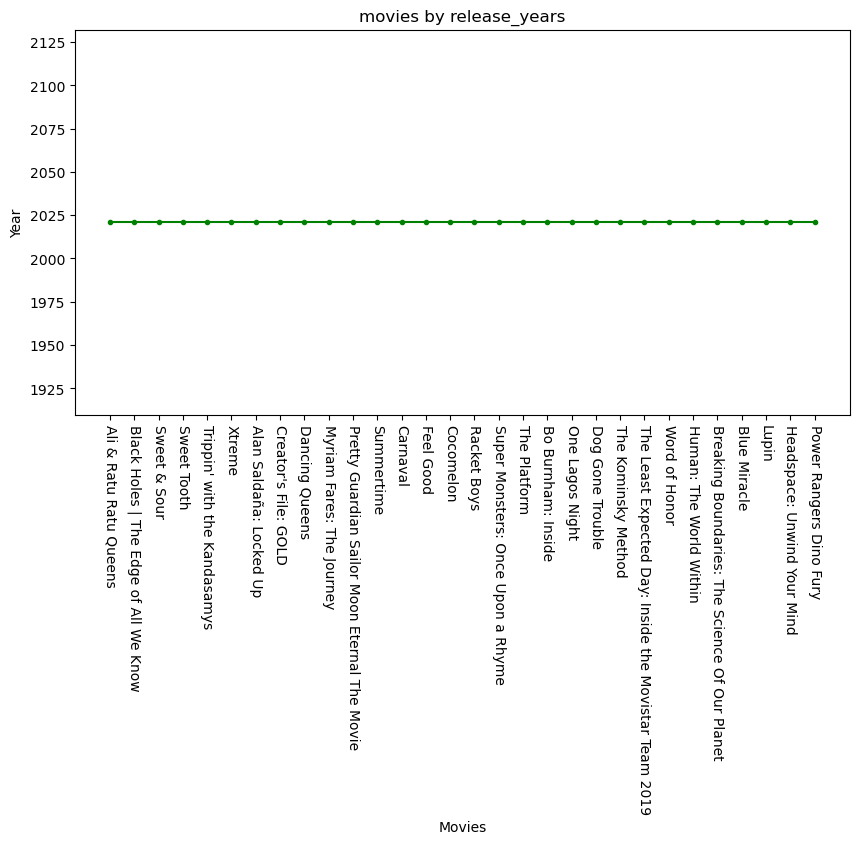

In [18]:
plt.figure(figsize=(10,5))
plt.plot(top_songs['title'],top_songs['release_year'],color='g',marker='.')
plt.title('movies by release_years')
plt.xlabel('Movies')
plt.ylabel('Year')
plt.xticks(rotation=-90)
plt.show()

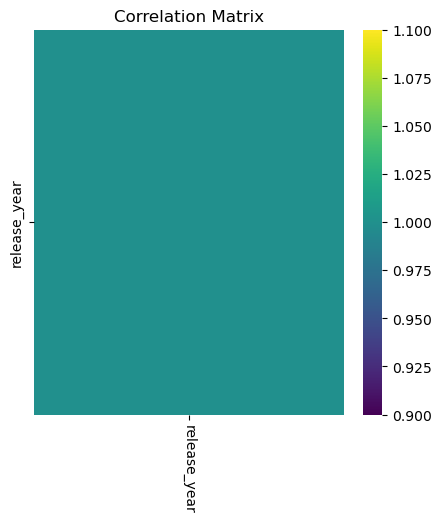

In [19]:
corr=dt.drop(['director','title','listed_in'],axis=1).corr()
fig, ax = plt.subplots(figsize=(5,5))
ticks=np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.title('Correlation Matrix')
sns.heatmap(corr,cmap='viridis')
plt.xticks(rotation=-90)
plt.show()

In [21]:
key_dist=dt[['show_id','release_year']]
key_dist=key_dist.groupby('show_id',as_index=False).sum().sort_values(by='release_year').head(7)
key_dist

,show_id,release_year
3614,s4251,1925
7546,s7791,1942
8008,s8206,1942
8513,s8661,1943
8601,s8740,1943
8627,s8764,1943
8246,s8420,1944


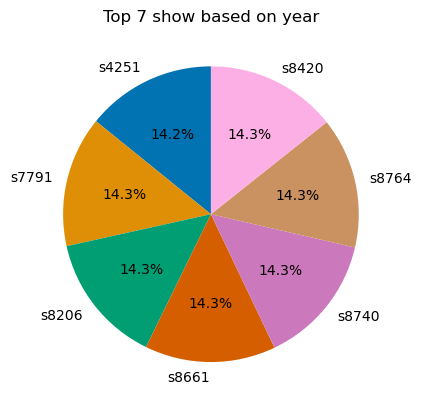

In [23]:
plt.title('Top 7 show based on year')
plt.pie(key_dist['release_year'],labels=key_dist['show_id'],startangle=90,autopct='%1.1f%%',colors=sns.color_palette('colorblind'))
plt.show()